In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def show_random_images(dataset, num_images=20):
    random_indices = random.sample(range(len(dataset)), num_images)
    plt.figure(figsize=(15, 10))
    for i, idx in enumerate(random_indices):
        filename, act_name = dataset[idx]
        img = mpimg.imread(filename)
        plt.subplot(4, 5, i + 1)
        plt.imshow(img)
        plt.title(", ".join(act_name))
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [2]:
import os

# Define the folder path
folder_path = './content/pushups'

# Initialize the dataset
dataset = []

# Iterate through the files in the folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):  # Ensure it's a file
        dataset.append((file_path, ["down"]))

folder_path = './content/standing'

# Iterate through the files in the folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):  # Ensure it's a file
        dataset.append((file_path, ["up"]))

# Žiūrim ką turim. 🥸
for i, datum in enumerate(dataset):
    filename, act_name = datum
    if i > 100:
        break
    print(f"I: {i}. Filename {filename} act Name: {act_name}")

I: 0. Filename ./content/pushups/images?q=tbn:ANd9GcTipRg3kgcAKY1Tkkv3-DdWU3ieLf1D2Ufbgg&s act Name: ['down']
I: 1. Filename ./content/pushups/images?q=tbn:ANd9GcSrq5Rpn32O1LrxtdJ0XHVEeAycjYnD5I1U1Q&s act Name: ['down']
I: 2. Filename ./content/pushups/images?q=tbn:ANd9GcQ1zk-gZtJr_7EKR-lj7Sxbrss-IsFUwFR45A&s act Name: ['down']
I: 3. Filename ./content/pushups/images?q=tbn:ANd9GcStvUucv9ug4dkD0212d969hHxxtN6dmv1ABw&s act Name: ['down']
I: 4. Filename ./content/pushups/images?q=tbn:ANd9GcSFcv_uArv-n5jKvs9B3GEmTSU0EuudGQKaPg&s act Name: ['down']
I: 5. Filename ./content/pushups/images?q=tbn:ANd9GcQSEDvfeLHdYfuizjS297D7Gn588-uhO4kdAA&s act Name: ['down']
I: 6. Filename ./content/pushups/DSC_0526.JPG act Name: ['down']
I: 7. Filename ./content/pushups/images?q=tbn:ANd9GcTLfIXJxE7iGQ_SJty50yNoHqQfdv1vETz-qA&s act Name: ['down']
I: 8. Filename ./content/pushups/images?q=tbn:ANd9GcRaofQsvW9_l2BcEp89U0Etet77Pa_8ja5RlQ&s act Name: ['down']
I: 9. Filename ./content/pushups/images?q=tbn:ANd9GcQIw

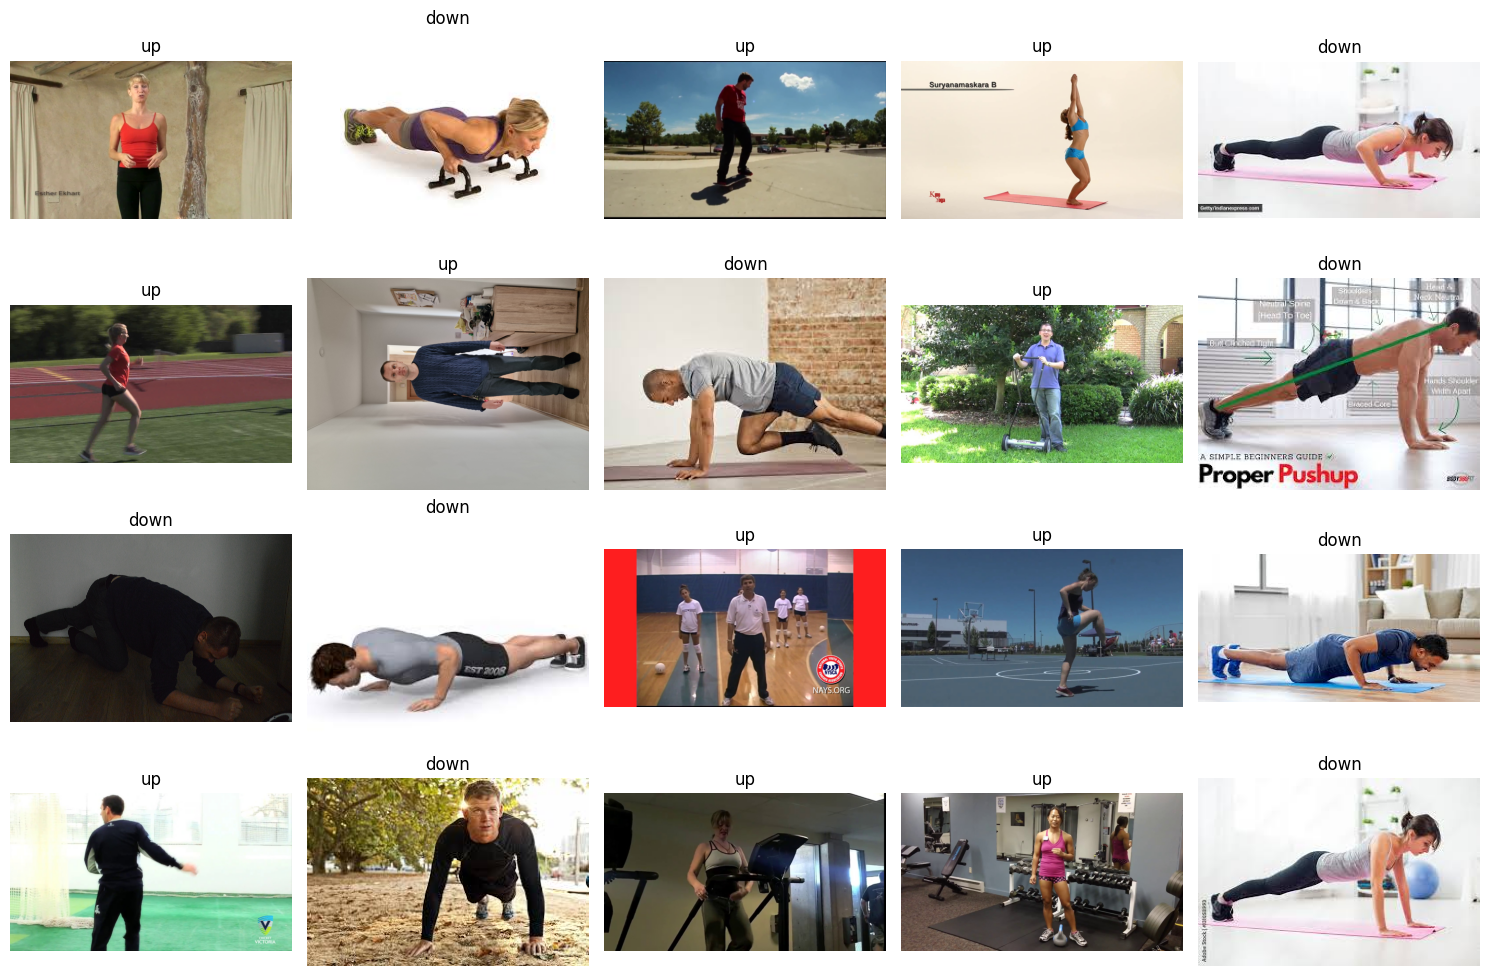

In [3]:
show_random_images(dataset, num_images=20)

In [7]:
# Count the number of items in each category
category_counts = {}

for _, categories in dataset:
    for category in categories:
        category_counts[category] = category_counts.get(category, 0) + 1

# Print the counts for each category
for category, count in category_counts.items():
    print(f"Category: {category}, Count: {count}")


Category: down, Count: 388
Category: up, Count: 530


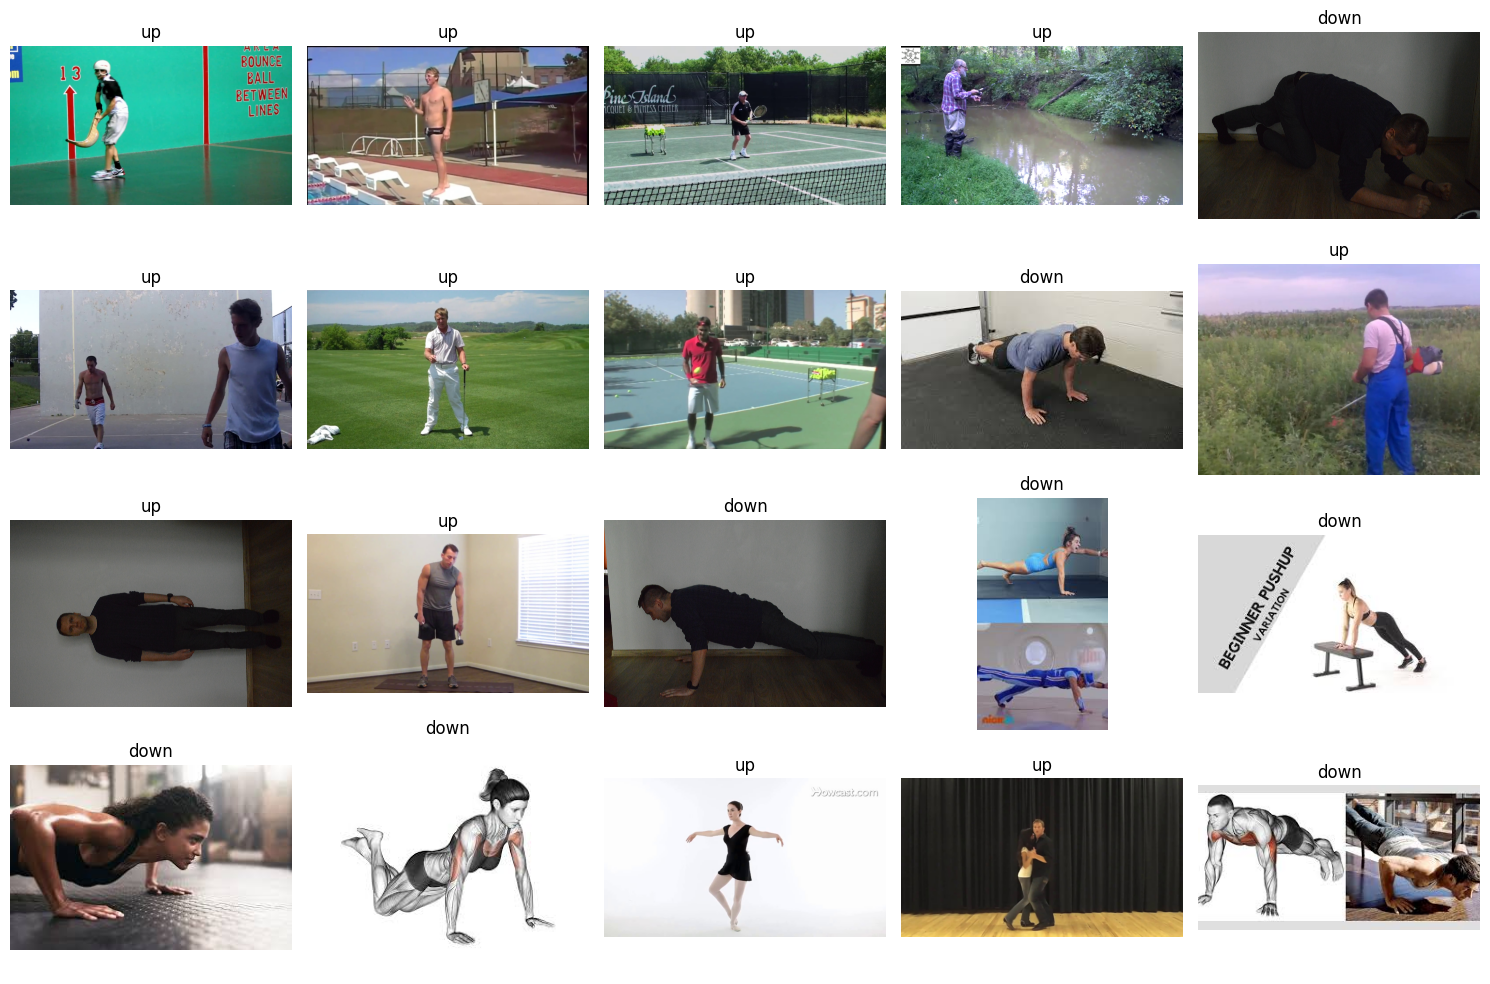

In [15]:
show_random_images(dataset, num_images=20)

In [9]:
import random
print(f"Filtered dataset size: {len(dataset)}")
random.shuffle(dataset)
activities_set = {"down", "up"}
num_classes = len(activities_set)
print(dataset)

Filtered dataset size: 918
[('./content/standing/000906310.jpg', ['up']), ('./content/pushups/images?q=tbn:ANd9GcTcCcEpl8GojM3ZWqrcVlx5tZdzWxei6wkwfg&s', ['down']), ('./content/pushups/images?q=tbn:ANd9GcTalMu5uLIYBhLQofiu5R4aRhhrWZtVS2LhFQ&s', ['down']), ('./content/standing/010587432.jpg', ['up']), ('./content/standing/002335210.jpg', ['up']), ('./content/pushups/images?q=tbn:ANd9GcTWlJYJidQdhCCtMWqTtiid_ZIlr9s1ab--rQ&s', ['down']), ('./content/standing/015574976.jpg', ['up']), ('./content/pushups/images?q=tbn:ANd9GcQ1Y3Wp2RvgNwi847Sp0skqMue1snaRreHQPg&s', ['down']), ('./content/pushups/images?q=tbn:ANd9GcSUG95tBLl1dK2u9hgI9BTlMg1cxTELSbMFOQ&s', ['down']), ('./content/standing/001119931.jpg', ['up']), ('./content/standing/021854846.jpg', ['up']), ('./content/pushups/images?q=tbn:ANd9GcTdp1Sy9XXowbEHrlHNcSqUzCu2iVjmvYKaSA&s', ['down']), ('./content/pushups/images?q=tbn:ANd9GcT8t2kxyiPRuRvqNbK_4F8wmVDJmFxc1bEnZA&s', ['down']), ('./content/pushups/images?q=tbn:ANd9GcSU2E71yF5UpITP85czJE

In [10]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

from sklearn.preprocessing import LabelEncoder

# Create a label encoder for activities
label_encoder = LabelEncoder()
all_activities = list(activities_set)
label_encoder.fit(all_activities)


# Update the MPIIDataset class
class MPIIDataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_path, act_name = self.data[idx]
        image = Image.open(image_path).convert('RGB')  # Ensure RGB format

        if self.transform:
            image = self.transform(image)

        # Convert activity name(s) to numerical label(s)
        label = label_encoder.transform(act_name)  # Convert to numerical indices
        label = label[0] if len(label) > 0 else 0  # Handle single-label case

        return image, label


# Split the dataset into train, validation, and test sets
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

train_size = int(len(dataset) * train_ratio)
val_size = int(len(dataset) * val_ratio)
test_size = len(dataset) - train_size - val_size

train_dataset = []
val_dataset = []
test_dataset = []

train_size = int(len(dataset) * train_ratio)
val_size = int(len(dataset) * val_ratio)

for i in range(len(dataset)):
    if i < train_size:
        train_dataset.append(dataset[i])
    elif i < train_size + val_size:
        val_dataset.append(dataset[i])
    else:
        test_dataset.append(dataset[i])

print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0), ratio=(0.75, 1.333)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomGrayscale(p=0.5),  # Add random grayscale with a probability of 0.1 (10%)
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.RandomGrayscale(p=0.5),  # Add random grayscale with a probability of 0.1 (10%)
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = MPIIDataset(train_dataset, transform=train_transform)
val_dataset = MPIIDataset(val_dataset, transform=val_transform)
test_dataset = MPIIDataset(test_dataset, transform=val_transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


Train dataset size: 734
Validation dataset size: 91
Test dataset size: 93
